In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.24.1


In [5]:
# loading the pre-processed dataset
data = pd.read_csv('C:/users/parit/Internship/Data/Loan data/loan_prediction_data_new.csv')

In [6]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [7]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [9]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [10]:
# looking at the shape of the data
data.shape

(614, 12)

In [11]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [13]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [15]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [16]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [17]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [18]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [19]:
# number of input neurons
X_train.shape

(491, 11)

In [20]:
# number of features in the data
X_train.shape[1]

11

In [21]:
# defining input neurons
input_neurons = X_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [0]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [22]:
# define number of output neurons
output_neurons = 1

In [23]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [34]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 32
neuron_hidden_layer_2 = 32

In [25]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [43]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [36]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [37]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

352

In [38]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

362

In [39]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

1029

In [40]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

33

## 4. Compiling the model (defining loss function, optimizer)

In [45]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [46]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 1s 33ms/step - loss: 0.6299 - accuracy: 0.6864 - val_loss: 0.6061 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6864 - val_loss: 0.5972 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.6864 - val_loss: 0.5912 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.6864 - val_loss: 0.5853 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5791 - accuracy: 0.6884 - val_loss: 0.5781 - val_accuracy: 0.7073
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.6925 - val_loss: 0.5719 - val_accuracy: 0.6992
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.7067 - val_loss: 0.5655 - val_accuracy: 0.6992
Epoch 8/50
16/16 [=

## 6. Evaluating model performance on validation set

In [48]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

In [49]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8048780487804879

### Visualizing the model performance

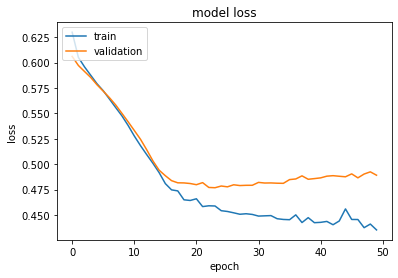

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

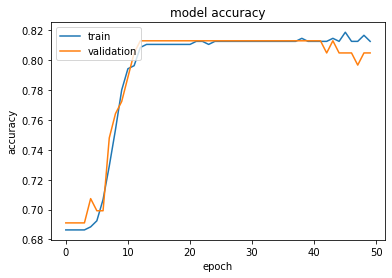

In [56]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()